In [133]:
import pandas as pd
import sklearn as sk
import tensorflow as tf
import matplotlib.pyplot as plt

In [134]:
from sklearn import datasets
data=datasets.load_digits()
data

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [135]:
print(data.target.shape)
print(data.target)
print(data.images[0])
print(data.images[0].shape)
print(data.feature_names)


(1797,)
[0 1 2 ... 8 9 8]
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
(8, 8)
['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_

In [136]:
x=data.images
y=data.target
print(y[22],x[22])
y=tf.keras.utils.to_categorical(y)


2 [[ 0.  0.  8. 16.  5.  0.  0.  0.]
 [ 0.  1. 13. 11. 16.  0.  0.  0.]
 [ 0.  0. 10.  0. 13.  3.  0.  0.]
 [ 0.  0.  3.  1. 16.  1.  0.  0.]
 [ 0.  0.  0.  9. 12.  0.  0.  0.]
 [ 0.  0.  3. 15.  5.  0.  0.  0.]
 [ 0.  0. 14. 15.  8.  8.  3.  0.]
 [ 0.  0.  7. 12. 12. 12. 13.  1.]]


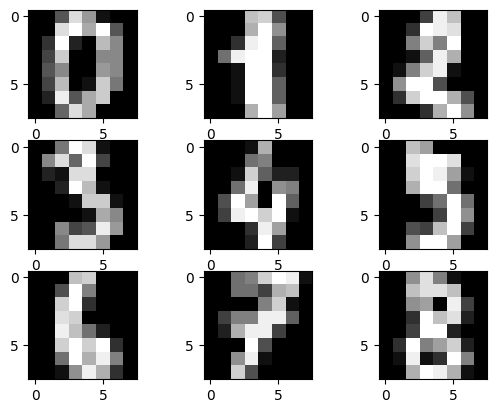

In [137]:
for i in range(9):  
    plt.subplot(330 + 1 + i)
    plt.imshow(x[i], cmap=plt.get_cmap('gray'))
plt.show()

In [138]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

In [139]:
def make_model():
    model=Sequential([
        Conv2D(32,(3,3),activation='relu',input_shape=(8,8,1)),
        MaxPool2D((2,2)),
        Flatten(),
        Dense(64,activation='relu'),
        Dense(10,activation='softmax')
    ])
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    return model


In [140]:
model=make_model()
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 6, 6, 32)          320       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 3, 3, 32)         0         
 g2D)                                                            
                                                                 
 flatten_16 (Flatten)        (None, 288)               0         
                                                                 
 dense_38 (Dense)            (None, 64)                18496     
                                                                 
 dense_39 (Dense)            (None, 10)                650       
                                                                 
Total params: 19,466
Trainable params: 19,466
Non-trainable params: 0
_________________________________________________

In [141]:
x_train=x[:1000]
y_train=y[:1000]
x_test=x[1000:]
y_test=y[1000:]
print(y_train[2],y_train[2])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [143]:
history=model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test),batch_size=128)

Epoch 1/10
8/8 [==============================] - 0s 13ms/step - loss: 0.1056 - accuracy: 0.9800 - val_loss: 0.2242 - val_accuracy: 0.9335
Epoch 2/10
8/8 [==============================] - 0s 7ms/step - loss: 0.0923 - accuracy: 0.9830 - val_loss: 0.2230 - val_accuracy: 0.9360
Epoch 3/10
8/8 [==============================] - 0s 7ms/step - loss: 0.0804 - accuracy: 0.9870 - val_loss: 0.2055 - val_accuracy: 0.9360
Epoch 4/10
8/8 [==============================] - 0s 7ms/step - loss: 0.0683 - accuracy: 0.9890 - val_loss: 0.1985 - val_accuracy: 0.9473
Epoch 5/10
8/8 [==============================] - 0s 6ms/step - loss: 0.0608 - accuracy: 0.9940 - val_loss: 0.2031 - val_accuracy: 0.9398
Epoch 6/10
8/8 [==============================] - 0s 6ms/step - loss: 0.0528 - accuracy: 0.9970 - val_loss: 0.1935 - val_accuracy: 0.9473
Epoch 7/10
8/8 [==============================] - 0s 7ms/step - loss: 0.0482 - accuracy: 0.9960 - val_loss: 0.1834 - val_accuracy: 0.9460
Epoch 8/10
8/8 [=================

In [153]:
import numpy as np
y_pred=model.predict(x_test)
y_pred
y_pred_n=np.argmax(y_pred,axis=1)
y_pred_new=tf.keras.utils.to_categorical(y_pred_n)
y_pred_new[2]

25/25 [==============================] - 0s 1ms/step


array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [154]:
from sklearn.metrics import classification_report

print(classification_report(y_pred_new,y_test))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        76
           1       0.89      1.00      0.94        71
           2       0.96      0.96      0.96        77
           3       0.86      0.96      0.91        71
           4       0.94      0.97      0.96        80
           5       0.98      0.96      0.97        83
           6       1.00      0.99      0.99        81
           7       0.97      0.99      0.98        79
           8       1.00      0.89      0.94        85
           9       0.98      0.84      0.90        94

   micro avg       0.95      0.95      0.95       797
   macro avg       0.95      0.96      0.95       797
weighted avg       0.96      0.95      0.95       797
 samples avg       0.95      0.95      0.95       797

